In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-sales-prediction-dataset/Ecommerce_Sales_Prediction_Dataset.csv


### Step 1: Loading the Dataset and Importing Required Libraries

#### Markdown:
We will first import the required libraries and load the dataset. This step ensures that the data is ready for exploration and analysis. We'll also check the first few rows of the dataset to understand its structuredftwrr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
```

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/e-commerce-sales-prediction-dataset/Ecommerce_Sales_Prediction_Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(df.head())


Dataset Head:
         Date Product_Category   Price  Discount Customer_Segment  \
0  01-01-2023           Sports  932.80     35.82       Occasional   
1  02-01-2023             Toys  569.48      3.60          Premium   
2  03-01-2023       Home Decor  699.68      3.56          Premium   
3  04-01-2023             Toys  923.27      0.61          Premium   
4  05-01-2023             Toys  710.17     47.83          Premium   

   Marketing_Spend  Units_Sold  
0          6780.38          32  
1          6807.56          16  
2          3793.91          27  
3          9422.75          29  
4          1756.83          17  


### Step 2: Data Overview and Summary Statistics

#### Markdown:
We will examine the dataset's structure, check for missing values, and display summary statistics. This provides an overview of the dataset and helps identify potential data quality issues.




In [3]:
# Dataset information
print("\nDataset Info:")
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB

Missing Values:
Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

Summary Statistics:
             Price     Discount  Marketing_Spend   Units_Sold
count  1000.000000  1000.000000      1000.000000  1000.000000
mean    505.241920    24.919750      4912.830240    29.631000
std

### Step 3: Visualizing the Distribution of Product Prices

#### Markdown:
We will create a histogram to visualize the distribution of product prices. This helps understand pricing patterns and identify any anomalies.





/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


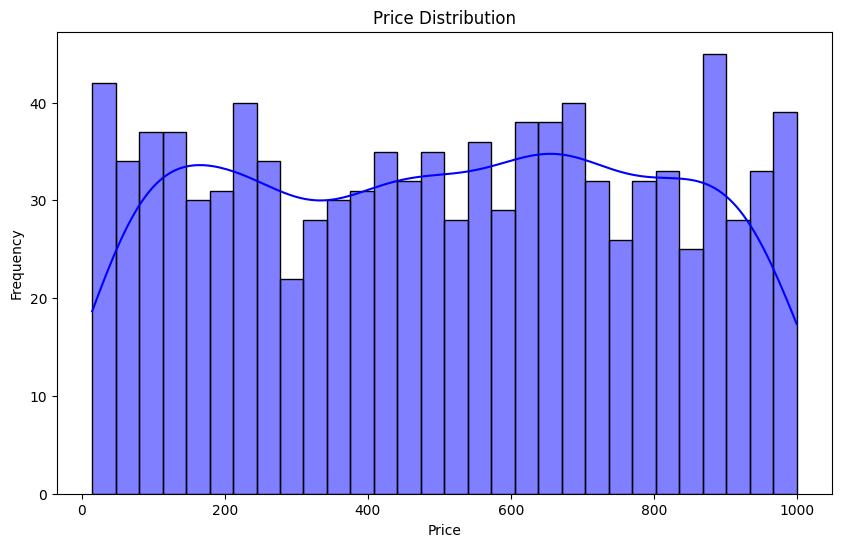

In [4]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### Step 4: Exploring the Relationship Between Discount and Units Sold

#### Markdown:
A scatter plot will be used to analyze how discounts impact the number of units sold. This helps us understand if higher discounts drive higher sales.




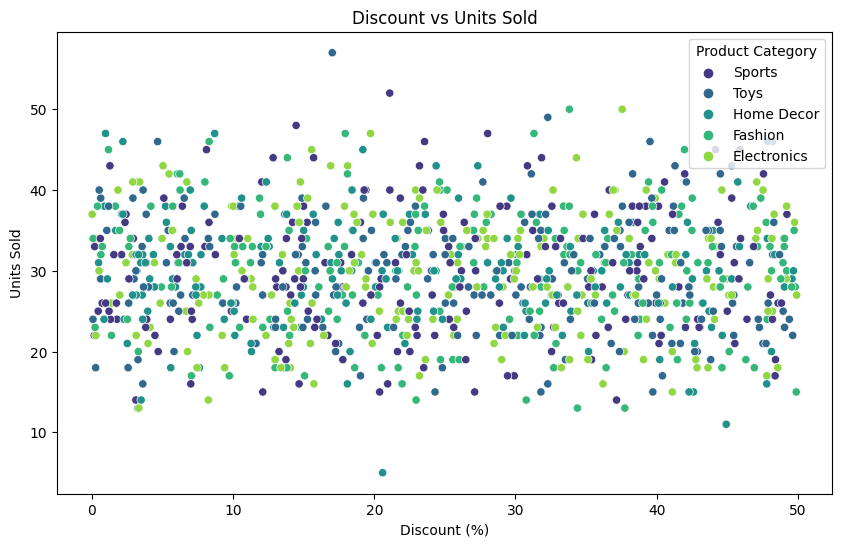

In [5]:
# Discount vs Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Units_Sold', hue='Product_Category', palette='viridis')
plt.title('Discount vs Units Sold')
plt.xlabel('Discount (%)')
plt.ylabel('Units Sold')
plt.legend(title='Product Category')
plt.show()


### Step 5: Correlation Heatmap

#### Markdown:
We'll create a correlation heatmap to identify relationships between numerical features in the dataset. This can reveal which factors influence sales.

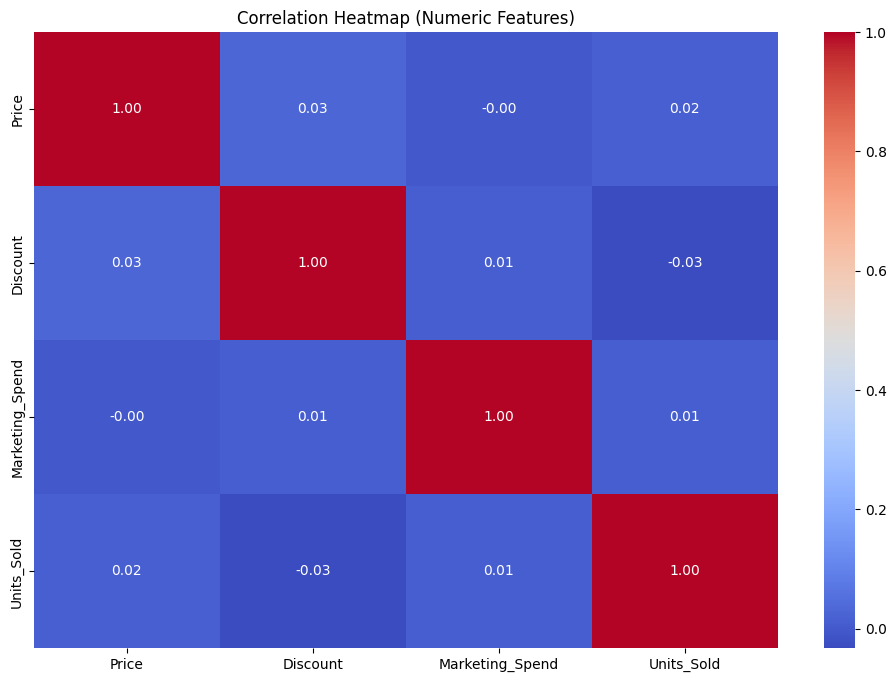

In [6]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


--

### Step 6: Analyze Sales Over down:
We'll analyze how the number of units sold changes over time by grouping the dataset by `Date` and plotting a time ser()g Spend')
plt.ylabel('Units Sold')
plt.legend(title='Customer Segment')
plt.grid()
plt.show()
```justments are needed!

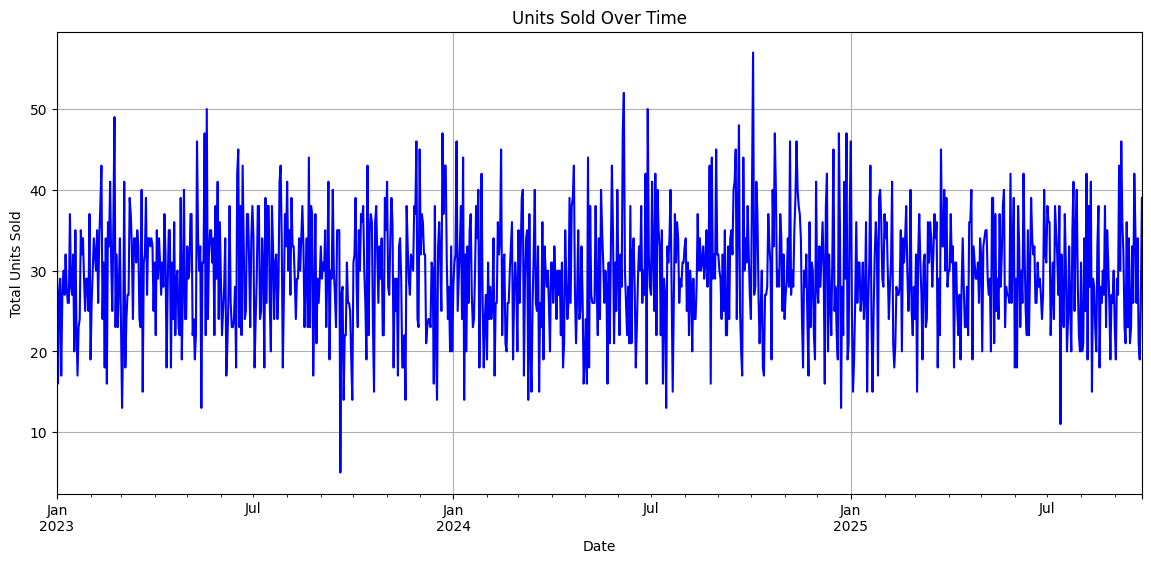

In [7]:
# Convert 'Date' to datetime format with the correct day-first format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Group data by 'Date' and calculate total units sold per day
sales_over_time = df.groupby('Date')['Units_Sold'].sum()

# Plot the sales trend over time
plt.figure(figsize=(14, 6))
sales_over_time.plot(color='blue')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.grid()
plt.show()



### Step 7: Distribution of Discounts
We'll analyze the distribution of discounts to identify common discount ranges.







/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


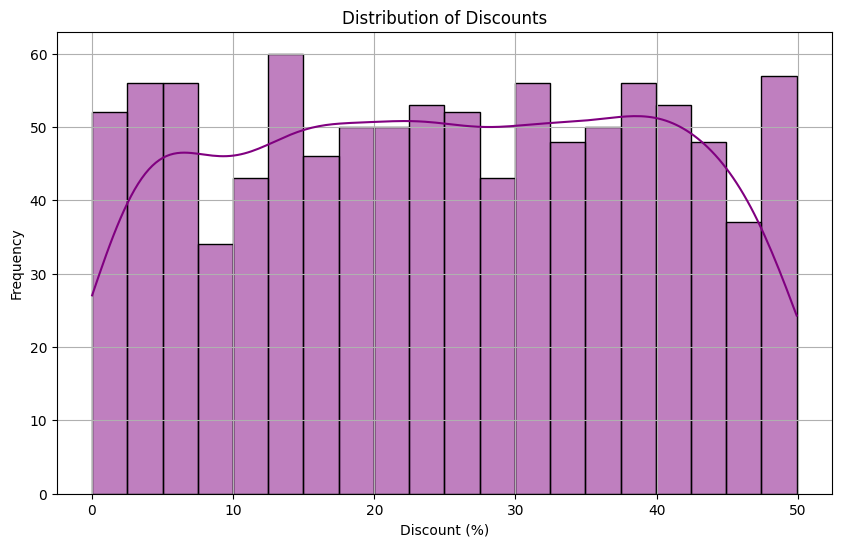

In [8]:
# Plot distribution of discounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'], bins=20, kde=True, color='purple')
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.grid()
plt.show()



### Step 8: Units Sold by Customer Segment
#### Markdown:
We'll compare the average number of units sold across different customer segments.



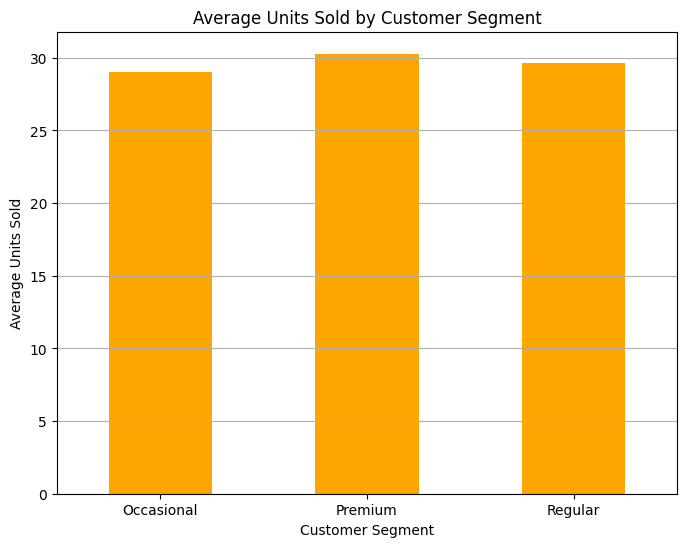

In [9]:
# Calculate the average units sold by customer segment
units_sold_by_segment = df.groupby('Customer_Segment')['Units_Sold'].mean()

# Plot the results
plt.figure(figsize=(8, 6))
units_sold_by_segment.plot(kind='bar', color='orange')
plt.title('Average Units Sold by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Step 9: Price vs. Units Sold
#### Markdown:
We'll examine the relationship between product price and units sold using a scatter plot.





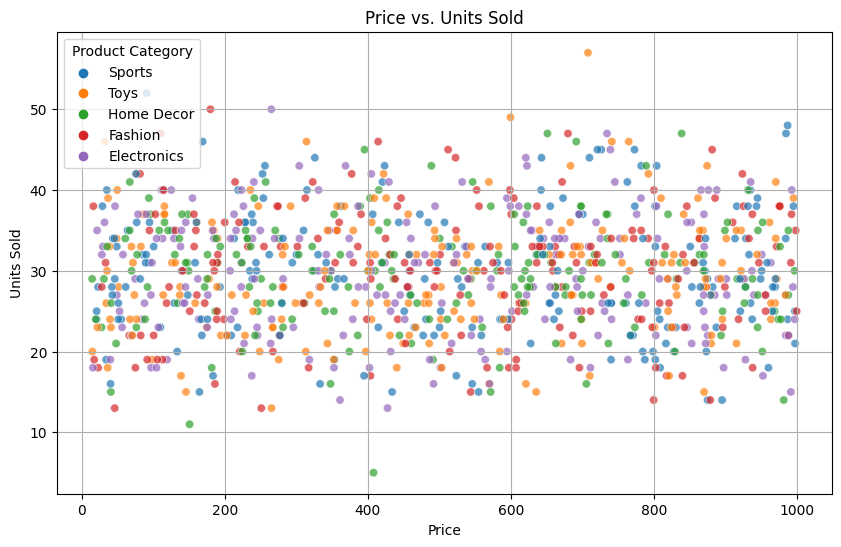

In [10]:
# Scatter plot of price vs. units sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Units_Sold', hue='Product_Category', alpha=0.7)
plt.title('Price vs. Units Sold')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.legend(title='Product Category')
plt.grid()
plt.show()


### Step 10: Marketing Spend vs. Units Sold
#### Markdown:
We'll explore the impact of marketing spend on the number of units sold using a scatter plot.

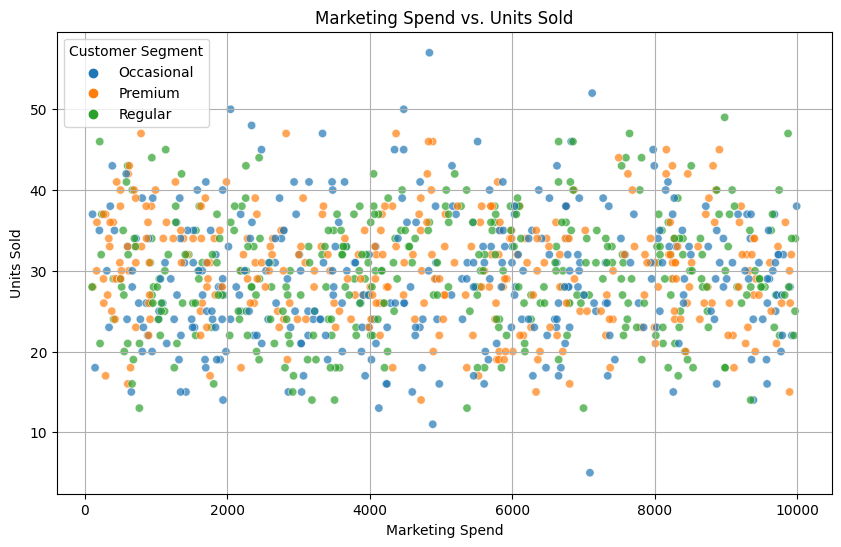

In [11]:
# Scatter plot of marketing spend vs. units sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Marketing_Spend', y='Units_Sold', hue='Customer_Segment', alpha=0.7)
plt.title('Marketing Spend vs. Units Sold')
plt.xlabel('Marketing Spend')
plt.ylabel('Units Sold')
plt.legend(title='Customer Segment')
plt.grid()
plt.show()
